In [1]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from copy import copy
from astropy.io import fits
from sprinkler import BaseSprinkler, OM10Reader, GoldsteinSNeCatReader, DC2Reader, DC2Sprinkler

In [1]:
test_agn_cat = '../data/twinkles_lenses_cosmoDC2_v1.1.4.fits'
test_sne_cat = '../data/glsne_test.h5'
test_dc2_cat = '../data/test_ddf.pkl'

## Define new sprinkler with a new AGN density function

### We are going to try to match the OM10 redshift and magnitude distributions

First we design a probability distribution in each component for galaxies that will get matched.

In [4]:
# Load OM10 catalog
hdulist = fits.open(test_agn_cat)
agn_cat = hdulist[1].data

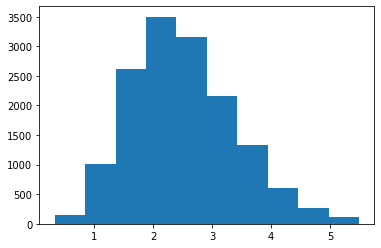

In [10]:
n_z, bins_z, _ = plt.hist(agn_cat['ZSRC'])

In [18]:
bins_z[0], 10**(np.log10(bins_z[0])-0.1)

(0.33, 0.26212831745901294)

In [19]:
bins_z[-1], 10**(np.log10(bins_z[-1])+.1)

(5.49, 6.911500510749978)

In [7]:
n_mag, bins_mag = np.histogram(agn_cat['MAGI_IN'], bins=20)

(array([3.000e+00, 2.800e+01, 1.470e+02, 8.100e+02, 2.396e+03, 4.625e+03,
        4.537e+03, 2.065e+03, 2.430e+02, 1.500e+01]),
 array([15.73 , 16.854, 17.978, 19.102, 20.226, 21.35 , 22.474, 23.598,
        24.722, 25.846, 26.97 ]),
 <a list of 10 Patch objects>)

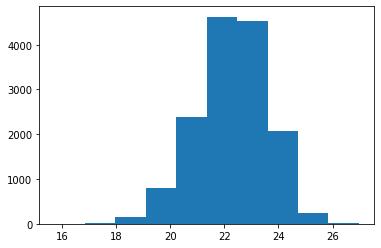

In [8]:
plt.hist(agn_cat['MAGI_IN'])

In [56]:
dens_mag = np.zeros(22)
dens_mag[1:-1] = copy(n_mag)/np.sum(n_mag)
bins_mag = np.zeros(22)
bins_mag[1:-1] = copy(mag_bins)
bins_mag[0] = -99
bins_mag[-1] = 100.

ValueError: could not broadcast input array from shape (21) into shape (20)

In [52]:
plt.

(array([0.00000000e+00, 6.72540184e-05, 1.34508037e-04, 4.70778129e-04,
        1.41233439e-03, 2.48839868e-03, 7.39794203e-03, 1.76878068e-02,
        3.67879481e-02, 6.24117291e-02, 9.87288991e-02, 1.44730648e-01,
        1.66319188e-01, 1.63360011e-01, 1.41771471e-01, 9.63750084e-02,
        4.25045396e-02, 1.28455175e-02, 3.49720896e-03, 8.07048221e-04,
        2.01762055e-04, 0.00000000e+00]),
 array([-99.   , -99.   ,  15.73 ,  16.292,  16.854,  17.416,  17.978,
         18.54 ,  19.102,  19.664,  20.226,  20.788,  21.35 ,  21.912,
         22.474,  23.036,  23.598,  24.16 ,  24.722,  25.284,  25.846,
         26.408,  26.97 , 100.   , 100.   ]))

In [ ]:
dc2_sp = DC2Sprinkler(test_agn_cat, OM10Reader,
                      test_sne_cat, GoldsteinSNeCatReader,
                      test_dc2_cat, DC2Reader)

In [33]:
0.5 < agn_sp.agn_density({'galaxy_id':0.005, 'redshift':0.1, 'mag_i_agn':24.})

0.005 0.1 24.0


False

In [31]:
agn_hosts, agn_sys_cat = agn_sp.sprinkle_agn()

2565055322 1.05066794 17.251804
2565055322 1.05066794 17.251804
2565060861 1.05240359 17.251804
2565060861 1.05240359 17.251804
2565060861 1.05240359 17.251804
2565060861 1.05240359 17.251804
2565089416 1.05062055 17.251804
2565089416 1.05062055 17.251804
2565246341 1.04916772 17.251804
2565246341 1.04916772 17.251804
2565246341 1.04916772 17.251804
2565246341 1.04916772 17.251804
2565266262 1.06375289 17.251804
2565266262 1.06375289 17.251804
2565274687 1.0935483 17.251804
2565274687 1.0935483 17.251804
2565279054 1.10670424 17.251804
2565279054 1.10670424 17.251804
2565279054 1.10670424 17.251804
2565279054 1.10670424 17.251804
2565283788 1.08432412 17.251804
2565283788 1.08432412 17.251804
2565285648 1.07340479 17.251804
2565285648 1.07340479 17.251804
2565285648 1.07340479 17.251804
2565285648 1.07340479 17.251804
2565286147 1.05573535 17.251804
2565286147 1.05573535 17.251804
2565289120 1.06412435 17.251804
2565289120 1.06412435 17.251804
2565289120 1.06412435 17.251804
2565289120

In [34]:
agn_hosts

,galaxy_id,ra,dec,redshift,gamma_1,gamma_2,kappa,av_internal_disk,av_internal_bulge,rv_internal_disk,...,semi_minor_axis_bulge,position_angle,magnorm_disk,magnorm_bulge,fluxes_disk,fluxes_bulge,gal_type,magnorm_agn,mag_i_agn,varParamStr_agn
896,2565657034,53.613712,-28.148636,1.116046,0.017152,-0.006857,-0.012269,0.0,0.0,3.1,...,0.654324,3.872094,"[16.99346705, 16.99762725, 17.05642226, 17.076...","[16.99346705, 16.99762725, 17.05642226, 17.076...","[0.000737, 0.002257, 0.0015609999999999999, 0....","[0.000737, 0.002257, 0.0015609999999999999, 0....",kinney_elliptical,17.633345,17.251804,"{'m': 'applyAgn', 'p': {'seed': 4614010}}"
907,2565690964,53.440800,-28.396528,1.138791,0.009117,-0.004479,-0.010730,0.0,0.0,3.1,...,0.654324,3.872094,"[16.99346705, 16.99762725, 17.05642226, 17.076...","[16.99346705, 16.99762725, 17.05642226, 17.076...","[0.000737, 0.002257, 0.0015609999999999999, 0....","[0.000737, 0.002257, 0.0015609999999999999, 0....",kinney_elliptical,17.633345,17.251804,"{'m': 'applyAgn', 'p': {'seed': 4614010}}"
1095,2566070332,53.082929,-28.250016,1.180112,-0.002762,-0.003645,-0.014897,0.0,0.0,3.1,...,0.654324,3.872094,"[16.99346705, 16.99762725, 17.05642226, 17.076...","[16.99346705, 16.99762725, 17.05642226, 17.076...","[0.000737, 0.002257, 0.0015609999999999999, 0....","[0.000737, 0.002257, 0.0015609999999999999, 0....",kinney_elliptical,17.633345,17.251804,"{'m': 'applyAgn', 'p': {'seed': 4614010}}"
1930,2568350457,52.812954,-28.083384,1.528724,-0.004244,-0.009155,-0.030025,0.0,0.0,3.1,...,0.654324,3.872094,"[16.99346705, 16.99762725, 17.05642226, 17.076...","[16.99346705, 16.99762725, 17.05642226, 17.076...","[0.000737, 0.002257, 0.0015609999999999999, 0....","[0.000737, 0.002257, 0.0015609999999999999, 0....",kinney_elliptical,17.633345,17.251804,"{'m': 'applyAgn', 'p': {'seed': 4614010}}"
